In [1]:
import nltk
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\wordnet.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping taggers\averaged_perceptron_tagger.zip.


True

In [3]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

from nltk.stem.wordnet import WordNetLemmatizer
from nltk import pos_tag
from nltk.corpus import wordnet
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.layers import LSTM, Dense, Bidirectional
from tensorflow.keras.layers import Dropout, SpatialDropout1D, TimeDistributed,Flatten, GlobalMaxPool1D
from tensorflow.keras.layers import Embedding
from keras.layers import multiply
import seaborn as sns
import matplotlib.pyplot as plt

import re
from tqdm import tqdm
from sklearn.model_selection import train_test_split

In [44]:
train_data = pd.read_csv('C:\\Users\Asus\\Documents\\Deep Learning\\NLP\\quora-question-pairs (1)\\train\\train.csv')
test_data = pd.read_csv("C:\\Users\\Asus\\Documents\\Deep Learning\\NLP\\quora-question-pairs (1)\\test\\test.csv")

C:\ProgramData\Anaconda3\envs\newEnv\lib\site-packages\IPython\core\interactiveshell.py:3072: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [8]:
train_data.shape

(404290, 6)

In [9]:
train_data.head(4)

,id,qid1,qid2,question1,question2,is_duplicate
0,0,1,2,What is the step by step guide to invest in sh...,What is the step by step guide to invest in sh...,0
1,1,3,4,What is the story of Kohinoor (Koh-i-Noor) Dia...,What would happen if the Indian government sto...,0
2,2,5,6,How can I increase the speed of my internet co...,How can Internet speed be increased by hacking...,0
3,3,7,8,Why am I mentally very lonely? How can I solve...,Find the remainder when [math]23^{24}[/math] i...,0


In [10]:
test_data.head()

,test_id,question1,question2
0,0,How does the Surface Pro himself 4 compare wit...,Why did Microsoft choose core m3 and not core ...
1,1,Should I have a hair transplant at age 24? How...,How much cost does hair transplant require?
2,2,What but is the best way to send money from Ch...,What you send money to China?
3,3,Which food not emulsifiers?,What foods fibre?
4,4,"How ""aberystwyth"" start reading?",How their can I start reading?


### Wordnet Lemmatizer (with POS tag)

In [11]:
def get_pos_tag(tag):
    if tag.startswith('J'):
        return wordnet.ADJ
    elif tag.startswith('V'):
        return wordnet.VERB
    elif tag.startswith('N'):
        return wordnet.NOUN
    elif tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

lemmatizer = WordNetLemmatizer()

In [13]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [35]:
regex = [
    r'<[^>]+>', #HTML tags
    r'@(\w+)', # @-mentions
    r"#(\w+)", # hashtags
    r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+', # URLs
    r'[^0-9a-z #+_\\r\\n\\t]', #BAD SYMBOLS
]

REPLACE_URLS = re.compile(r'http[s]?://(?:[a-z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-f][0-9a-f]))+')
REPLACE_HASH = re.compile(r'#(\w+)')
REPLACE_AT = re.compile(r'@(\w+)')
REPLACE_HTML_TAGS = re.compile(r'<[^>]+>')
REPLACE_BY = re.compile(r"[^a-z0-9\-]")

STOPWORDS = set(stopwords.words('english'))

def clean_text(text):
    text = text.lower()
    text = REPLACE_HTML_TAGS.sub(' ', text)
    text = REPLACE_URLS.sub('', text)
    text = REPLACE_HASH.sub('', text)
    text = REPLACE_AT.sub('', text)
    text = REPLACE_BY.sub(' ', text)
    
    
    text = " ".join(lemmatizer.lemmatize(word.strip(), get_pos_tag(pos_tag([word.strip()])[0][1])) for word in text.split() if word not in STOPWORDS and len(word)>3)
    
    return text

In [17]:
sentence = 'the cat is sitting with the bats on the striped mat under many badly flying geese'


In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\Asus\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


True

In [20]:
pos_tagged = nltk.pos_tag(nltk.word_tokenize(sentence))  

In [21]:
wordnet_tagged = list(map(lambda x: (x[0], get_pos_tag(x[1])), pos_tagged))

In [22]:
print(wordnet_tagged)

[('the', 'n'), ('cat', 'n'), ('is', 'v'), ('sitting', 'v'), ('with', 'n'), ('the', 'n'), ('bats', 'n'), ('on', 'n'), ('the', 'n'), ('striped', 'a'), ('mat', 'n'), ('under', 'n'), ('many', 'a'), ('badly', 'r'), ('flying', 'v'), ('geese', 'a')]


In [23]:
get_pos_tag(pos_tag(['playing'.strip()])[0][1])


'v'

In [24]:
lemmatizer.lemmatize('playing'.strip(), get_pos_tag(pos_tag(['playing'.strip()])[0][1]))

'play'

In [25]:
pos_tag(['word'.strip()])  #noun

[('word', 'NN')]

In [26]:
sen = 'kavia id is @kavia It is not gmail ID'

In [30]:
clean_text(sen)

'kavia gmail'

In [36]:
def clean_text1(text):
    text = text.lower()
    text = REPLACE_HTML_TAGS.sub(' ', text)
    text = REPLACE_URLS.sub('', text)
    text = REPLACE_HASH.sub('', text)
    text = REPLACE_AT.sub('', text)
    text = REPLACE_BY.sub(' ', text)
    
    
    text = " ".join(lemmatizer.lemmatize(word.strip(), get_pos_tag(pos_tag([word.strip()])[0][1])) for word in text.split() if word not in STOPWORDS)
    
    return text

In [37]:
clean_text1(sen)

'kavia id gmail id'

In [38]:
clean_text1('<html tag> is used here')

'use'

In [39]:
clean_text1('our website is http://annauniv.com live now')

'website live'

In [45]:
test_data.shape

(3563475, 3)

In [46]:
train_data.shape

(404290, 6)

In [47]:
train_data = train_data.sample(frac=0.2).reset_index(drop=True)
test_data = test_data.sample(frac=0.01).reset_index(drop=True)

In [48]:
train_data.shape

(80858, 6)

In [49]:
test_data.shape

(35635, 3)

In [50]:
train_data = train_data.drop(['id','qid1','qid2'],axis=1)


In [51]:
train_data.head()

,question1,question2,is_duplicate
0,What will be the output of the following program?,What is the output of the following program?,0
1,Who all are the eligible bachelors to marry Da...,Who can Daenerys marry in Westeros?,1
2,How are tomato classified as fruit or vegetables?,What classifies a fruit from a vegetable?,0
3,How do I get my UAN number?,How I obtain my UAN Number?,1
4,Does dish soap kill fleas?,Does washing your dog with Dawn dish soap real...,0


<AxesSubplot:>

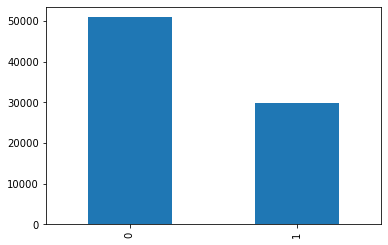

In [52]:
train_data.is_duplicate.value_counts().plot(kind='bar')

In [53]:
train_data[train_data['is_duplicate']==1].shape,train_data[train_data['is_duplicate']==0].shape

((29935, 3), (50923, 3))

In [54]:
is_duplicate = train_data[train_data['is_duplicate']==1]
not_duplicate = train_data[train_data['is_duplicate']==0].sample(29935)

In [56]:
train_data = pd.concat([is_duplicate,not_duplicate])
train_data = train_data.sample(frac=1).reset_index(drop=True)
train_data

,question1,question2,is_duplicate
0,Why is America named after Amerigo Vespucci an...,What was the name of America before Christophe...,0
1,What is a frozen shoulder?,What is frozen shoulder?,1
2,What is the best coffee bean you have ever had?,What's the best coffee bean?,0
3,Can I substitute corn flour for plain flour?,Can I use spelt flour in place of plain flour?,0
4,"How can one get away with murder, without any ...",How do you kill someone and get away with it?,1
...,...,...,...
59865,How do I make a remote controlled device?,How can one make a remote control for all devi...,0
59866,Is that possible to increase height after age ...,How girls can increase their height after 18 y...,1
59867,Is it true CAT 2016 will have less number of Q...,What will happen if I only answer 4-5 question...,0
59868,How can I get back in my Facebook without a va...,How do I get into my Facebook if I can't remem...,1


In [57]:
train_data[train_data['is_duplicate']==1].shape,train_data[train_data['is_duplicate']==0].shape

((29935, 3), (29935, 3))

In [58]:
import numpy as np
from sklearn.model_selection import train_test_split

In [64]:
train_data

,question1,question2,is_duplicate
0,Why is America named after Amerigo Vespucci an...,What was the name of America before Christophe...,0
1,What is a frozen shoulder?,What is frozen shoulder?,1
2,What is the best coffee bean you have ever had?,What's the best coffee bean?,0
3,Can I substitute corn flour for plain flour?,Can I use spelt flour in place of plain flour?,0
4,"How can one get away with murder, without any ...",How do you kill someone and get away with it?,1
...,...,...,...
59865,How do I make a remote controlled device?,How can one make a remote control for all devi...,0
59866,Is that possible to increase height after age ...,How girls can increase their height after 18 y...,1
59867,Is it true CAT 2016 will have less number of Q...,What will happen if I only answer 4-5 question...,0
59868,How can I get back in my Facebook without a va...,How do I get into my Facebook if I can't remem...,1


In [65]:
train, test = train_test_split(train_data, test_size=0.2)

In [67]:
train.shape

(47896, 3)

In [68]:
test.shape

(11974, 3)

In [69]:
train[train['is_duplicate']==1].shape,train[train['is_duplicate']==0].shape

((23991, 3), (23905, 3))

In [70]:
test[test['is_duplicate']==1].shape,test[test['is_duplicate']==0].shape

((5944, 3), (6030, 3))

In [74]:
train['question1']

2586     Which are the best dancing bollywood songs for...
19398                     What should I do to impress you?
19946    What is the difference between schizophrenia a...
25247    What does Gary Johnson have to do to have a ch...
54090    What are some countries that were democracies ...
                               ...                        
22613    What is the best way to lose weight and not ga...
14824    When will i get my withdrawl bleeding its been...
36859    Fashion E-commerce: Why does ZARA  not sell on...
53207    What is a good Warrior Cat name for an apprent...
48378    Why are former British colonies doing so well ...
Name: question1, Length: 47896, dtype: object

In [75]:
train['question1']=train['question1'].astype(str)

C:\ProgramData\Anaconda3\envs\newEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [76]:
train['question1']

2586     Which are the best dancing bollywood songs for...
19398                     What should I do to impress you?
19946    What is the difference between schizophrenia a...
25247    What does Gary Johnson have to do to have a ch...
54090    What are some countries that were democracies ...
                               ...                        
22613    What is the best way to lose weight and not ga...
14824    When will i get my withdrawl bleeding its been...
36859    Fashion E-commerce: Why does ZARA  not sell on...
53207    What is a good Warrior Cat name for an apprent...
48378    Why are former British colonies doing so well ...
Name: question1, Length: 47896, dtype: object

In [77]:
train['question2']=train['question2'].astype(str)

C:\ProgramData\Anaconda3\envs\newEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [78]:
train['q1'] = train['question1'].apply(clean_text1)
train['q2'] = train['question2'].apply(clean_text1)

C:\ProgramData\Anaconda3\envs\newEnv\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
C:\ProgramData\Anaconda3\envs\newEnv\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [79]:
train

,question1,question2,is_duplicate,q1,q2
2586,Which are the best dancing bollywood songs for...,What are the best Bollywood farewell songs?,0,best dance bollywood song girl 2015-2016,best bollywood farewell song
19398,What should I do to impress you?,How do you impress an American?,0,impress,impress american
19946,What is the difference between schizophrenia a...,How is schizophrenia differentiated from psych...,1,difference schizophrenia psychosis,schizophrenia differentiate psychosis
25247,What does Gary Johnson have to do to have a ch...,Does Gary Johnson have any chance left at winn...,1,gary johnson chance win november,gary johnson chance left win presidency
54090,What are some countries that were democracies ...,Is it easier for a country to become a democra...,0,country democracy become dictatorship happen,easy country become democracy dictatorship eas...
...,...,...,...,...,...
22613,What is the best way to lose weight and not ga...,What is the best guide to lose unwanted pounds?,1,best way lose weight gain back,best guide lose unwanted pound
14824,When will i get my withdrawl bleeding its been...,How much time does the cranial nerve take to g...,0,get withdrawl bleeding 7 day since take unwant...,much time cranial nerve take get strong
36859,Fashion E-commerce: Why does ZARA not sell on...,What does Zara stand for?,0,fashion e-commerce zara sell online india,zara stand
53207,What is a good Warrior Cat name for an apprent...,What is a good Warrior Cat name for an apprent...,0,good warrior cat name apprentice name rosepaw,good warrior cat name apprentice name


In [80]:
max_len_q1 = np.max(train["q1"].apply(lambda x: len(x.split())))
max_len_q2 = np.max(train["q2"].apply(lambda x: len(x.split())))
max_len_q1, max_len_q2

(37, 96)

In [84]:
train = train.reset_index(drop=True)
test = test.reset_index(drop=True)

In [89]:
test['q1'] = test['question1'].apply(clean_text1)
test['q2'] = test['question2'].apply(clean_text1)

## Tokenization

In [90]:
MAX_NB_WORDS = 205000

tokenizer = Tokenizer(num_words = MAX_NB_WORDS)

tokenizer.fit_on_texts(list(train['q1'].values.astype(str))+list(train['q2'].values.astype(str)))


X_train_q1 = tokenizer.texts_to_sequences(train['q1'].values.astype(str))
X_train_q1 = pad_sequences(X_train_q1, maxlen = 30, padding = 'post')

X_train_q2 = tokenizer.texts_to_sequences(train['q2'].values.astype(str))
X_train_q2 = pad_sequences(X_train_q2, maxlen = 30, padding = 'post')

X_test_q1 = tokenizer.texts_to_sequences(test['q1'].ravel())
X_test_q1 = pad_sequences(X_test_q1,maxlen = 30, padding='post')

X_test_q2 = tokenizer.texts_to_sequences(test['q2'].astype(str).ravel())
X_test_q2 = pad_sequences(X_test_q2, maxlen = 30, padding='post')

In [91]:
y = train['is_duplicate']

In [92]:
y_test = test['is_duplicate']

In [93]:
vocab_size = len(tokenizer.word_index) + 1

## Word Embedding using GloVe

In [95]:
import os

In [97]:
glove_dir = 'C:\\Users\\Asus\\Documents\\Deep Learning\\NLP\\quora-question-pairs (1)\\glove.6B'

embeddings_index = {}

glovefile = open('C:\\Users\\Asus\\Documents\\Deep Learning\\NLP\\quora-question-pairs (1)\\glove.6B\\glove.6B.200d.txt','r',encoding='utf-8')
for line in tqdm(glovefile):
    values = line.split(" ")
    word = values[0]
    coefs = np.asarray(values[1:], dtype='float32')
#     coefs.shape
    embeddings_index[word] = coefs
glovefile.close()

400000it [00:19, 20272.64it/s]


In [98]:
print('Found %s word vectors.' % len(embeddings_index))


Found 400000 word vectors.


In [99]:
embedding_matrix = np.zeros((len(tokenizer.word_index)+1, 200))
for words, index in tqdm(tokenizer.word_index.items()):
    embedding_vector = embeddings_index.get(word)
    if embedding_vector is not None:
        embedding_matrix[index] = embedding_vector

100%|██████████| 24888/24888 [00:00<00:00, 622063.41it/s]


In [100]:
#Validation split

X_train_q1,X_valid_q1, X_train_q2, X_valid_q2, y_train, y_valid = train_test_split(X_train_q1, X_train_q2, y, 
                                                                                   test_size=0.20, random_state=12)
print(X_train_q1.shape, X_train_q2.shape, y_train.shape)
print(X_valid_q1.shape, X_valid_q2.shape, y_valid.shape)

(38316, 30) (38316, 30) (38316,)
(9580, 30) (9580, 30) (9580,)


In [102]:
from tensorflow.keras import regularizers

In [106]:
from keras import layers

In [116]:
from tensorflow.keras.layers import Bidirectional

In [237]:
# Model for Q1

model_q1 = Sequential()

In [238]:
model_q1.add(Embedding(input_dim = vocab_size,output_dim = 200,input_length = 30))
model_q1.add(Bidirectional(LSTM(32, return_sequences = True)))
model_q1.add(Bidirectional(LSTM(32, return_sequences = True)))
model_q1.add(Bidirectional(LSTM(32, return_sequences = True)))
model_q1.add(Dense(60, activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l1(0.005)))
model_q1.add(Dense(2, activation='sigmoid'))

In [239]:
model_q1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 30, 200)           4977800   
_________________________________________________________________
bidirectional_44 (Bidirectio (None, 30, 64)            59648     
_________________________________________________________________
bidirectional_45 (Bidirectio (None, 30, 64)            24832     
_________________________________________________________________
bidirectional_46 (Bidirectio (None, 30, 64)            24832     
_________________________________________________________________
dense_30 (Dense)             (None, 30, 60)            3900      
_________________________________________________________________
dense_31 (Dense)             (None, 30, 2)             122       
Total params: 5,091,134
Trainable params: 5,091,134
Non-trainable params: 0
___________________________________________

In [240]:
model_q1.layers[0].set_weights([embedding_matrix])
model_q1.layers[0].trainable=False

In [241]:
model_q1.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_13 (Embedding)     (None, 30, 200)           4977800   
_________________________________________________________________
bidirectional_44 (Bidirectio (None, 30, 64)            59648     
_________________________________________________________________
bidirectional_45 (Bidirectio (None, 30, 64)            24832     
_________________________________________________________________
bidirectional_46 (Bidirectio (None, 30, 64)            24832     
_________________________________________________________________
dense_30 (Dense)             (None, 30, 60)            3900      
_________________________________________________________________
dense_31 (Dense)             (None, 30, 2)             122       
Total params: 5,091,134
Trainable params: 113,334
Non-trainable params: 4,977,800
_____________________________________

## Building model

In [244]:
# Model for Q2

model_q2 = Sequential()

In [245]:
model_q2.add(Embedding(input_dim = vocab_size,output_dim = 200,input_length = 30))
model_q2.add(Bidirectional(LSTM(32, return_sequences = True)))
model_q2.add(Bidirectional(LSTM(32, return_sequences = True)))
model_q2.add(Bidirectional(LSTM(32, return_sequences = True)))
model_q2.add(Dense(60, activation = 'tanh', kernel_regularizer=tf.keras.regularizers.l1(0.005)))
model_q2.add(Dense(2, activation='sigmoid'))

In [246]:
model_q2.layers[0].set_weights([embedding_matrix])
model_q2.layers[0].trainable=False

In [247]:
model_q2.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding_15 (Embedding)     (None, 30, 200)           4977800   
_________________________________________________________________
bidirectional_47 (Bidirectio (None, 30, 64)            59648     
_________________________________________________________________
bidirectional_48 (Bidirectio (None, 30, 64)            24832     
_________________________________________________________________
bidirectional_49 (Bidirectio (None, 30, 64)            24832     
_________________________________________________________________
dense_32 (Dense)             (None, 30, 60)            3900      
_________________________________________________________________
dense_33 (Dense)             (None, 30, 2)             122       
Total params: 5,091,134
Trainable params: 113,334
Non-trainable params: 4,977,800
_____________________________________

In [248]:
from keras.models import Model 
from keras.models import Sequential
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint, ReduceLROnPlateau
from keras.layers.normalization import BatchNormalization
from keras.preprocessing.text import Tokenizer
from keras.layers import LSTM, Dense, Bidirectional
from keras.layers import Dropout, SpatialDropout1D, TimeDistributed,Flatten, GlobalMaxPool1D
from keras.layers import Embedding

In [249]:
# Merging the output of the two models,i.e, model_q1 and model_q2
mergedOut = multiply([model_q1.output, model_q2.output])

mergedOut = Flatten()(mergedOut)
mergedOut = Dense(100, activation = 'relu')(mergedOut)
mergedOut = Dropout(0.2)(mergedOut)
mergedOut = Dense(50, activation = 'relu', kernel_regularizer=tf.keras.regularizers.l2(0.001))(mergedOut)
mergedOut = Dropout(0.2)(mergedOut)
mergedOut = Dense(2, batch_size=32, activation = 'sigmoid')(mergedOut)

In [250]:
model_q1.output

<tf.Tensor 'dense_31/Sigmoid:0' shape=(None, 30, 2) dtype=float32>

In [251]:
mergedOut 

<tf.Tensor 'dense_36/Sigmoid:0' shape=(None, 2) dtype=float32>

In [253]:
new_model.summary()

Model: "model_3"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
embedding_13_input (InputLayer) (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_15_input (InputLayer) (None, 30)           0                                            
__________________________________________________________________________________________________
embedding_13 (Embedding)        (None, 30, 200)      4977800     embedding_13_input[0][0]         
__________________________________________________________________________________________________
embedding_15 (Embedding)        (None, 30, 200)      4977800     embedding_15_input[0][0]         
____________________________________________________________________________________________

### COMPILATION 

In [252]:
new_model = Model([model_q1.input, model_q2.input], mergedOut)
new_model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
                 metrics = ['accuracy'])

In [254]:
from keras.callbacks import EarlyStopping

In [255]:
es = EarlyStopping(monitor='val_acc', mode='max', verbose=1, patience=7)

In [256]:
history = new_model.fit([X_train_q1,X_train_q2],y_train,
                        batch_size = 2000, 
                        epochs = 20, 
                        validation_data = ([X_valid_q1,X_valid_q2],y_valid),
                        callbacks=[es])

Train on 38316 samples, validate on 9580 samples
Epoch 1/20
38316/38316 [==============================] - 10s 249us/step - loss: 4.6466 - accuracy: 0.5401 - val_loss: 4.2301 - val_accuracy: 0.6001
Epoch 2/20


C:\ProgramData\Anaconda3\envs\newEnv\lib\site-packages\keras\callbacks\callbacks.py:846: RuntimeWarning: Early stopping conditioned on metric `val_acc` which is not available. Available metrics are: val_loss,val_accuracy,loss,accuracy
  (self.monitor, ','.join(list(logs.keys()))), RuntimeWarning


38316/38316 [==============================] - 5s 138us/step - loss: 3.9164 - accuracy: 0.5926 - val_loss: 3.5498 - val_accuracy: 0.5986
Epoch 3/20
38316/38316 [==============================] - 5s 140us/step - loss: 3.2690 - accuracy: 0.6007 - val_loss: 2.9422 - val_accuracy: 0.6004
Epoch 4/20
38316/38316 [==============================] - 5s 136us/step - loss: 2.6947 - accuracy: 0.6006 - val_loss: 2.4081 - val_accuracy: 0.6014
Epoch 5/20
38316/38316 [==============================] - 5s 140us/step - loss: 2.1926 - accuracy: 0.5983 - val_loss: 1.9452 - val_accuracy: 0.6007
Epoch 6/20
38316/38316 [==============================] - 5s 140us/step - loss: 1.7619 - accuracy: 0.6017 - val_loss: 1.5551 - val_accuracy: 0.5979
Epoch 7/20
38316/38316 [==============================] - 5s 141us/step - loss: 1.4060 - accuracy: 0.6001 - val_loss: 1.2391 - val_accuracy: 0.6002
Epoch 8/20
38316/38316 [==============================] - 5s 142us/step - loss: 1.1240 - accuracy: 0.6040 - val_loss: 0.998

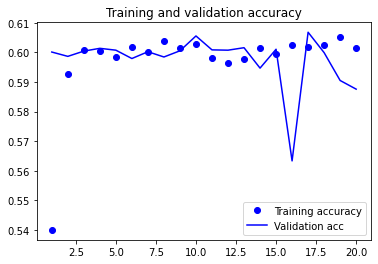

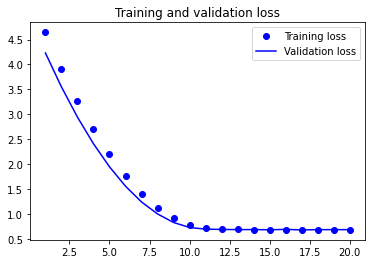

In [259]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [260]:
history = new_model.fit([X_train_q1,X_train_q2],y_train,
                        batch_size = 2000, 
                        epochs = 100, 
                        validation_data = ([X_valid_q1,X_valid_q2],y_valid),
                        callbacks=[es])

Train on 38316 samples, validate on 9580 samples
Epoch 1/100
38316/38316 [==============================] - 5s 136us/step - loss: 0.6786 - accuracy: 0.6021 - val_loss: 0.6760 - val_accuracy: 0.6096
Epoch 2/100
38316/38316 [==============================] - 5s 139us/step - loss: 0.6761 - accuracy: 0.6038 - val_loss: 0.6755 - val_accuracy: 0.6074
Epoch 3/100
38316/38316 [==============================] - 5s 137us/step - loss: 0.6765 - accuracy: 0.6030 - val_loss: 0.6757 - val_accuracy: 0.6048
Epoch 4/100
38316/38316 [==============================] - 5s 140us/step - loss: 0.6755 - accuracy: 0.6042 - val_loss: 0.6766 - val_accuracy: 0.6042
Epoch 5/100
38316/38316 [==============================] - 5s 139us/step - loss: 0.6760 - accuracy: 0.6030 - val_loss: 0.6740 - val_accuracy: 0.6084
Epoch 6/100
38316/38316 [==============================] - 5s 136us/step - loss: 0.6747 - accuracy: 0.6053 - val_loss: 0.6809 - val_accuracy: 0.5926
Epoch 7/100
38316/38316 [==============================] 

38316/38316 [==============================] - 5s 143us/step - loss: 0.6686 - accuracy: 0.6054 - val_loss: 0.6710 - val_accuracy: 0.6068
Epoch 56/100
38316/38316 [==============================] - 5s 143us/step - loss: 0.6670 - accuracy: 0.6062 - val_loss: 0.6689 - val_accuracy: 0.6063
Epoch 57/100
38316/38316 [==============================] - 6s 145us/step - loss: 0.6669 - accuracy: 0.6061 - val_loss: 0.6669 - val_accuracy: 0.6092
Epoch 58/100
38316/38316 [==============================] - 5s 143us/step - loss: 0.6664 - accuracy: 0.6072 - val_loss: 0.6681 - val_accuracy: 0.6071
Epoch 59/100
38316/38316 [==============================] - 6s 144us/step - loss: 0.6678 - accuracy: 0.6071 - val_loss: 0.6680 - val_accuracy: 0.6043
Epoch 60/100
38316/38316 [==============================] - 5s 141us/step - loss: 0.6672 - accuracy: 0.6068 - val_loss: 0.6677 - val_accuracy: 0.6042
Epoch 61/100
38316/38316 [==============================] - 5s 142us/step - loss: 0.6678 - accuracy: 0.6055 - val

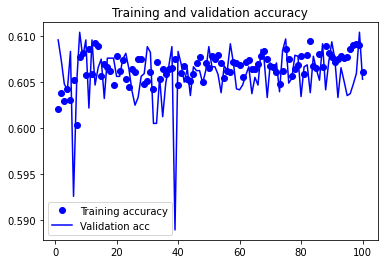

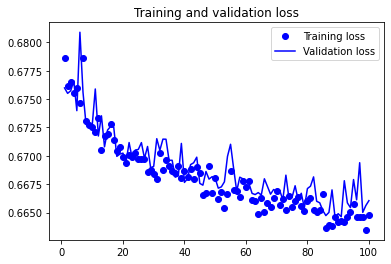

In [269]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()


In [270]:
y_pred = new_model.predict([X_test_q1, X_test_q2])

In [273]:
test_loss, test_acc = new_model.evaluate(x=[X_test_q1, X_test_q2], y=test['is_duplicate'] ,steps=50)

50/50 [==============================] - 14s 273ms/step


In [271]:
test

,question1,question2,is_duplicate,q1,q2
0,Is being white a privilege?,Does white privilege exist?,1,white privilege,white privilege exist
1,Does my boss like me romantically?,Does my boss secretly like me?,1,bos like romantically,bos secretly like
2,Can the 'last seen' status on viber be wrong?,"I installed viber on samsung note 5, why my st...",0,last see status viber wrong,instal viber samsung note 5 status always appe...
3,Were US Marines tougher than elite German troo...,"Were German soldiers in WW2 actually ""Nazis""?",0,u marine tougher elite german troop ww2,german soldier ww2 actually nazi
4,What is foreign exchange earnings?,What is foreign exchange revenue?,1,foreign exchange earnings,foreign exchange revenue
...,...,...,...,...,...
11969,Why is the government abruptly banning the 500...,What do you think about decision by the Indian...,1,government abruptly ban 500 rupee 1000 rupee c...,think decision indian government demonetise 50...
11970,Why do folks ask questions on Quora that a Goo...,Why do some people ask questions on Quora that...,1,folk ask question quora google search could an...,people ask question quora could ask directly s...
11971,What is nuclear fission and nuclear fusion?,What is the difference between nuclear fusion ...,0,nuclear fission nuclear fusion,difference nuclear fusion nuclear fission
11972,What should I do to improve my tennis?,What is the best way to be good at tennis?,1,improve tennis,best way good tennis


In [274]:
print(y_pred)

[[0.16889517 0.31461617]
 [0.16890518 0.31819946]
 [0.29052988 0.18174501]
 ...
 [0.19950087 0.28382394]
 [0.17860173 0.30498153]
 [0.2118057  0.25671655]]


In [275]:
np.argmax(y_pred[:10], axis=-1)  

array([1, 1, 0, 0, 1, 0, 1, 1, 1, 1], dtype=int64)

In [278]:
test['is_duplicate'][:10]

0    1
1    1
2    0
3    0
4    1
5    0
6    1
7    0
8    1
9    1
Name: is_duplicate, dtype: int64

In [285]:
print(test_loss)

0.013311331272125243


In [282]:
 from sklearn.metrics import mean_squared_error

In [284]:
mean_squared_error(test['is_duplicate'], np.argmax(y_pred, axis=-1)  )

0.3939368632036078